# ML Assignment 2 - Model Training
## Wine Quality Classification

This notebook trains 6 different ML models and evaluates them on wine quality data.

In [ ]:
# Import all the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, 
                             recall_score, f1_score, matthews_corrcoef,
                             confusion_matrix, classification_report)

# Our model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import pickle
import warnings
warnings.filterwarnings('ignore')

print("All imports successful! Ready to build the models.")

All imports successful! Ready to build the models.


In [ ]:
# Load the wine quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# peek at what we're working with
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nBasic Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nFeature Statistics:")
print(df.describe())

Dataset Shape: (1599, 12)

First few rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  

In [4]:
# Convert to binary classification problem
# Good wine (quality >= 6) vs Bad wine (quality < 6)
df['quality_binary'] = (df['quality'] >= 6).astype(int)
df = df.drop('quality', axis=1)

print("Class Distribution:")
print(df['quality_binary'].value_counts())
print("\nClass Percentages:")
print(df['quality_binary'].value_counts(normalize=True) * 100)

Class Distribution:
quality_binary
1    855
0    744
Name: count, dtype: int64

Class Percentages:
quality_binary
1    53.470919
0    46.529081
Name: proportion, dtype: float64


In [5]:
# Split features and target
X = df.drop('quality_binary', axis=1)
y = df['quality_binary']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

# Feature scaling - important for some models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use in Streamlit
pickle.dump(scaler, open('scaler.pkl', 'wb'))
print("Data preprocessed and scaler saved!")

Training set size: 1279
Test set size: 320
Number of features: 11
Data preprocessed and scaler saved!


In [ ]:
# Initialize all our models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'kNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False)
}

# Dictionary to store results
results = {}

Starting model training...



In [7]:
# Train each model and calculate metrics
for name, model in models.items():
    print(f"{'='*50}")
    print(f"Training {name}...")
    print('='*50)
    
    # Some models need scaled data, others don't
    if name in ['Logistic Regression', 'kNN', 'Naive Bayes']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate all required metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Store everything
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc': auc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'mcc': mcc,
        'predictions': y_pred,
        'predictions_proba': y_pred_proba
    }
    
    print(f"Training complete for {name}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  AUC: {auc:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    
    # Save the model
    model_filename = f"{name.lower().replace(' ', '_')}_model.pkl"
    pickle.dump(model, open(model_filename, 'wb'))
    print(f"  Model saved as: {model_filename}\n")

print("All models trained and saved!")

Training Logistic Regression...
Training complete for Logistic Regression
  Accuracy: 0.7406
  AUC: 0.8242
  F1 Score: 0.7409
  Model saved as: logistic_regression_model.pkl

Training Decision Tree...
Training complete for Decision Tree
  Accuracy: 0.7562
  AUC: 0.7755
  F1 Score: 0.7562
  Model saved as: decision_tree_model.pkl

Training kNN...
Training complete for kNN
  Accuracy: 0.7406
  AUC: 0.8117
  F1 Score: 0.7407
  Model saved as: knn_model.pkl

Training Naive Bayes...
Training complete for Naive Bayes
  Accuracy: 0.7219
  AUC: 0.7884
  F1 Score: 0.7219
  Model saved as: naive_bayes_model.pkl

Training Random Forest...
Training complete for Random Forest
  Accuracy: 0.8063
  AUC: 0.9018
  F1 Score: 0.8065
  Model saved as: random_forest_model.pkl

Training XGBoost...
Training complete for XGBoost
  Accuracy: 0.8250
  AUC: 0.8963
  F1 Score: 0.8252
  Model saved as: xgboost_model.pkl

All models trained and saved!


In [8]:
# Build the comparison dataframe
comparison_df = pd.DataFrame({
    'ML Model Name': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'AUC': [results[m]['auc'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1': [results[m]['f1'] for m in results],
    'MCC': [results[m]['mcc'] for m in results]
})

# Round to 4 decimal places for readability
comparison_df = comparison_df.round(4)

print("\n" + "="*80)
print("MODEL COMPARISON TABLE")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

# Save to CSV for reference
comparison_df.to_csv('model_comparison.csv', index=False)
print("\nComparison table saved as 'model_comparison.csv'")

# Find the best model
best_model_name = comparison_df.loc[comparison_df['F1'].idxmax(), 'ML Model Name']
print(f"\nBest performing model (by F1 score): {best_model_name}")


MODEL COMPARISON TABLE
      ML Model Name  Accuracy    AUC  Precision  Recall     F1    MCC
Logistic Regression    0.7406 0.8242     0.7419  0.7406 0.7409 0.4808
      Decision Tree    0.7562 0.7755     0.7562  0.7562 0.7562 0.5102
                kNN    0.7406 0.8117     0.7407  0.7406 0.7407 0.4790
        Naive Bayes    0.7219 0.7884     0.7282  0.7219 0.7219 0.4500
      Random Forest    0.8062 0.9018     0.8077  0.8062 0.8065 0.6128
            XGBoost    0.8250 0.8963     0.8259  0.8250 0.8252 0.6497

Comparison table saved as 'model_comparison.csv'

Best performing model (by F1 score): XGBoost


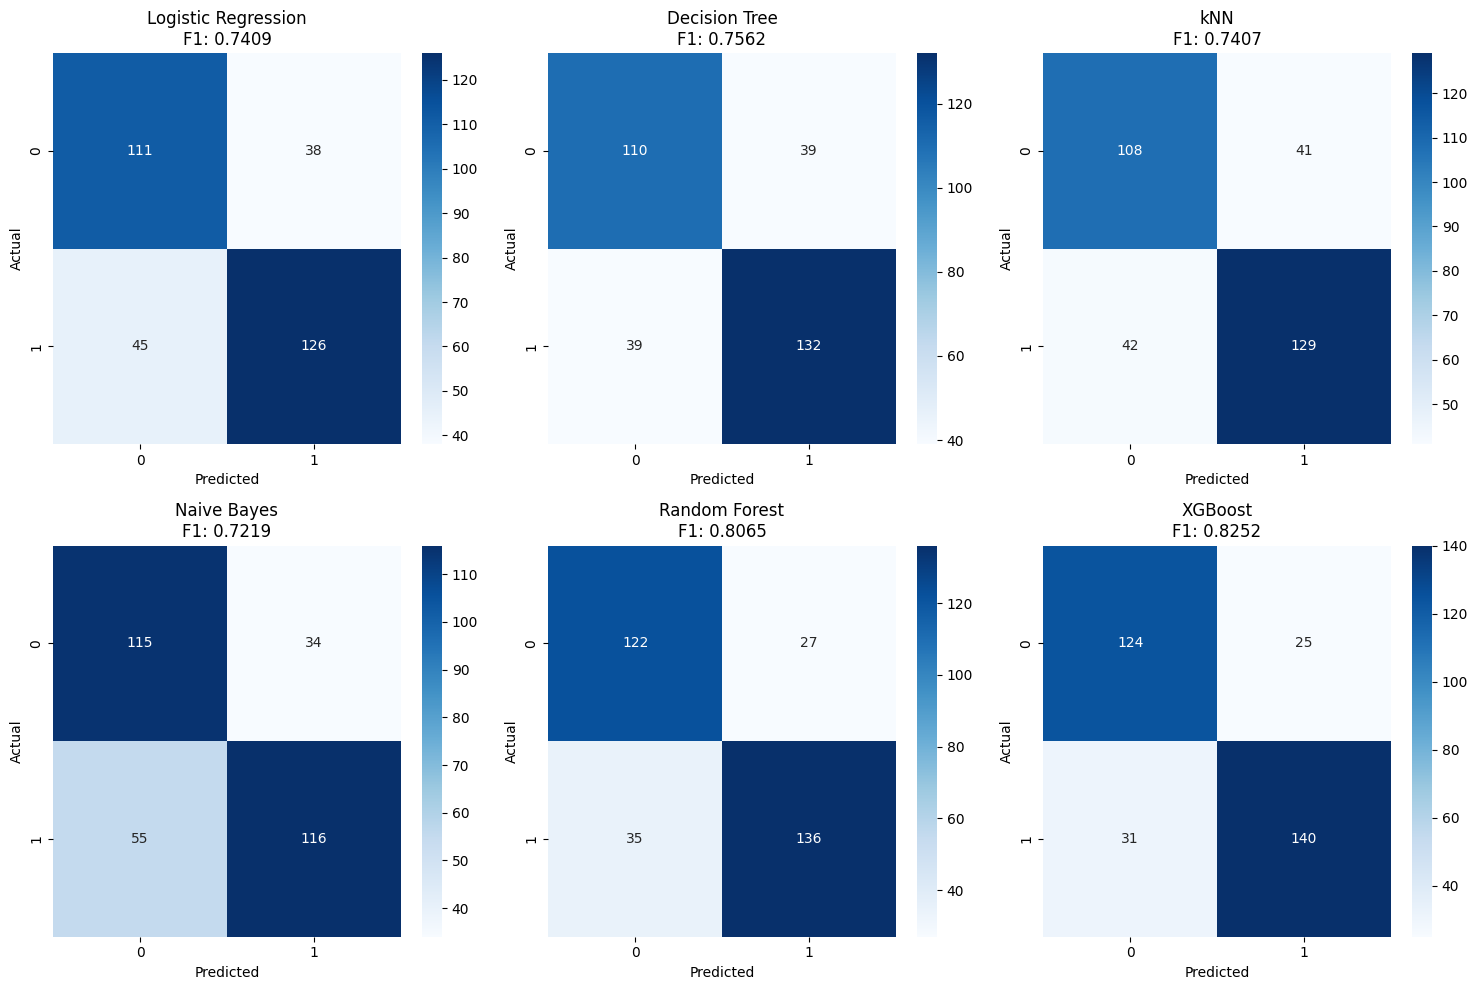

Confusion matrices saved!


In [9]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f'{name}\nF1: {result["f1"]:.4f}')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xlabel('Predicted')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()
print("Confusion matrices saved!")

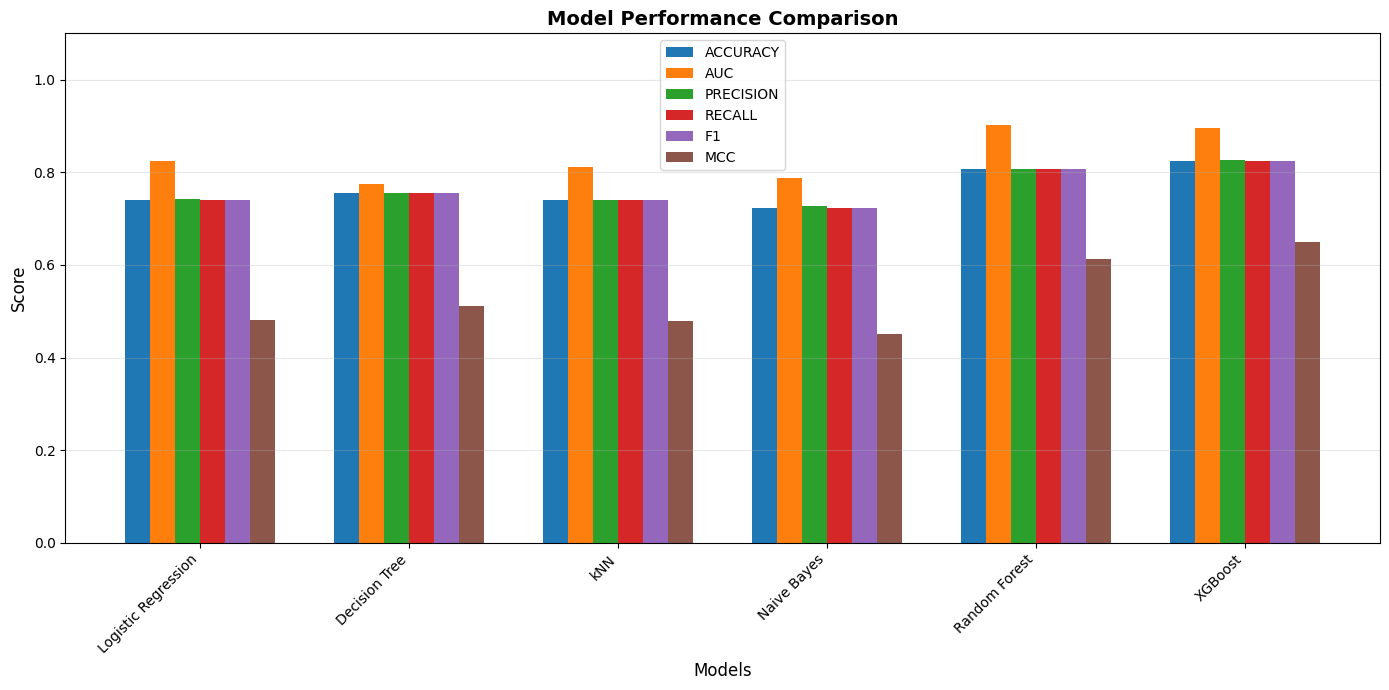

Metrics comparison chart saved!


In [10]:
# Plot metrics comparison
metrics = ['accuracy', 'auc', 'precision', 'recall', 'f1', 'mcc']
fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(results))
width = 0.12

for i, metric in enumerate(metrics):
    values = [results[m][metric] for m in results]
    ax.bar(x + i*width, values, width, label=metric.upper())

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2.5)
ax.set_xticklabels(results.keys(), rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.savefig('metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("Metrics comparison chart saved!")

In [11]:
# Print detailed classification reports for each model
for name, result in results.items():
    print(f"\n{'='*60}")
    print(f"Classification Report - {name}")
    print('='*60)
    print(classification_report(y_test, result['predictions'], 
                                target_names=['Bad Wine', 'Good Wine']))


Classification Report - Logistic Regression
              precision    recall  f1-score   support

    Bad Wine       0.71      0.74      0.73       149
   Good Wine       0.77      0.74      0.75       171

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320


Classification Report - Decision Tree
              precision    recall  f1-score   support

    Bad Wine       0.74      0.74      0.74       149
   Good Wine       0.77      0.77      0.77       171

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320


Classification Report - kNN
              precision    recall  f1-score   support

    Bad Wine       0.72      0.72      0.72       149
   Good Wine       0.76      0.75      0.76       171

    accuracy                           0.74       320
   macro avg   

In [12]:
# Save a sample of test data for Streamlit demo
test_sample = X_test.head(100).copy()
test_sample['actual_label'] = y_test.head(100).values
test_sample.to_csv('test_data_sample.csv', index=False)

print("Test data sample saved for Streamlit app!")
print(f"Sample size: {test_sample.shape}")
print("\nTraining complete! Ready for Streamlit app development.")
print("\nFiles created:")
print("  - 6 model .pkl files")
print("  - scaler.pkl")
print("  - model_comparison.csv")
print("  - test_data_sample.csv")
print("  - confusion_matrices.png")
print("  - metrics_comparison.png")

Test data sample saved for Streamlit app!
Sample size: (100, 12)

Training complete! Ready for Streamlit app development.

Files created:
  - 6 model .pkl files
  - scaler.pkl
  - model_comparison.csv
  - test_data_sample.csv
  - confusion_matrices.png
  - metrics_comparison.png
